# Ayudantía 6

# Ejercicio 3 Capitulo 3

diego.herrerag00@uc.cl


In [617]:
import warnings
warnings.filterwarnings('ignore')

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [619]:
df = pd.read_csv("E3_datos.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [620]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [621]:
columnas_numericas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

columnas_categoricas = ['ocean_proximity']


In [622]:
df.shape

(20640, 10)

In [623]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [624]:
df = df.dropna()

In [625]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Misión 1: Comparación y Evañuación predictiva de matriz de características


In [626]:
columnas_caracteristicas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

columnas_numericas_caracteristicas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

In [627]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [628]:
# Normalizamos el target usando el entrenamiento
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel() 
y_test= y_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel()

Obs: ravel convierte el arreglo de 2D (n, 1), que devuelve MinMaxScaler en un vector 1D (n,).

Para codificar las variables categoricas de la matriz caracteristica, usamos One-Hot Encoding, donde los parametros que usaremos son:

-handle_unknown='ignore': si aparece una categoría nueva en test, no se cae, y la codifica todo en 0.

-sparse_output=False: entrega una matriz “normal” (densa) más fácil de usar cuando hay pocas categorías.

In [629]:
columnas_categoricas = X_train.select_dtypes(include='object').columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 
encoder_train = encoder.fit_transform(X_train[['ocean_proximity']])
encoder_test  = encoder.transform(X_test[['ocean_proximity']])

In [630]:
# Construir dataframes codificados con nombres de columnas
columna_codificar = encoder.get_feature_names_out(columnas_categoricas)
categoricas_train_codificada= pd.DataFrame(encoder_train, columns=columna_codificar, index=X_train.index)
categoricas_test_codificada = pd.DataFrame(encoder_test,  columns=columna_codificar, index=X_test.index)

In [631]:
# Concatenar numéricas + categóricas codificadas
X_train = pd.concat([X_train[columnas_numericas_caracteristicas], categoricas_train_codificada], axis=1)
X_test  = pd.concat([X_test[columnas_numericas_caracteristicas],  categoricas_test_codificada], axis=1)

In [632]:
# Estandarizar todo el espacio de características
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

In [ ]:
# Entrenamos los modelos

modelos = {
    'Regresión Lineal': LinearRegression(),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'SVR (RBF)': SVR(kernel='rbf', C=10.0, epsilon=0.1)
}

resultados = []
modelos_entrenados = {}

for nombre, estimador in modelos.items():
    modelo = estimador
    # Entrenamiento
    modelo.fit(X_train, y_train)
    # Predecicion
    prediccion = modelo.predict(X_test)
    # Métricas 
    mae = mean_absolute_error(y_test, prediccion)
    rmse = mean_squared_error(y_test, prediccion, squared=False)
    r2 = r2_score(y_test, prediccion)
    resultados.append({'modelo': nombre, 'MAE': round(mae,3), 'RMSE': round(rmse,3), 'R2': round(r2,3)})
    modelos_entrenados[nombre] = modelo

# Ordenamos los resultados en un data frame
resultados_df = pd.DataFrame(resultados).sort_values('RMSE')


resultados_df


,modelo,MAE,RMSE,R2
3,SVR (RBF),0.080,0.113,0.779
1,KNN (k=5),0.085,0.128,0.717
2,Árbol de Decisión,0.088,0.139,0.666
0,Regresión Lineal,0.104,0.143,0.648


In [634]:
# Mejor modelo 
mejor = resultados_df.iloc[0]['modelo']
modelo_mejor = modelos_entrenados[mejor]

# Prediccion
prediccion = modelo_mejor.predict(X_test)

# Métricas 
rmse_final = mean_squared_error(y_test, prediccion, squared=False)
mae_final = mean_absolute_error(y_test, prediccion)
r2_final = r2_score(y_test, prediccion)

print(f"Mejor modelo: {mejor}")
print(f"RMSE: {round(rmse_final,3)}")
print(f"MAE: {round(mae_final,3)}")
print(f"R2: {round(r2_final,3)}")


Mejor modelo: SVR (RBF)
RMSE: 0.113
MAE: 0.08
R2: 0.779


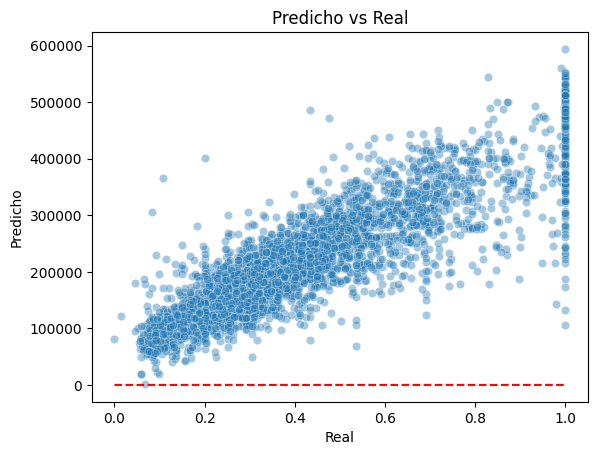

In [635]:
# Para visualizar, llevamos las predicciones a escala original
pred_original = y_scaler.inverse_transform(prediccion.reshape(-1,1)).ravel()

sns.scatterplot(x=y_test, y=pred_original, alpha=0.4)
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Predicho vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Misión 2: Desigualdad territorial y análisis social

In [636]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [637]:
import numpy as np

In [638]:
df_social = df.copy()

In [639]:
# Creamos cada indicador evitando division por cero 
df_social['habitaciones_por_hogar'] = df_social['total_rooms'] / df_social['households']
df_social['dormitorios_por_hogar']  = df_social['total_bedrooms'] / df_social['households']
df_social['personas_por_hogar']     = df_social['population'] / df_social['households']
df_social['personas_por_habitacion'] = df_social['population'] / df_social['total_rooms']

In [640]:
# Creamos una Función para limpiar un indicador

def limpiar_indicador(df, nombre_columna):
    serie = df[nombre_columna].copy().astype(float)
    serie = serie.replace([np.inf, -np.inf], np.nan) #Reemplazamos infinitos por NaN
    serie = serie.fillna(serie.median()) # Rellenamos los valores nulos por la mediana
    df[nombre_columna] = serie

In [641]:
# Limpiamos los indicadores creados
indicadores = ['habitaciones_por_hogar','dormitorios_por_hogar','personas_por_hogar','personas_por_habitacion']
for indicador in indicadores:
    limpiar_indicador(df_social, indicador)

In [642]:
df_social.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,habitaciones_por_hogar,dormitorios_por_hogar,personas_por_hogar,personas_por_habitacion
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0.347265
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627,2.139896,0.449402
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362,2.128405,0.431558
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,1.061824,1.788253,0.372745
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,1.117647,2.026891,0.472016
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.990196,2.172269,0.437025


In [643]:
# Creamos 5 tramos de ingreso del barrio
etiquetas_tramo = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_social['tramo_ingreso'] = pd.qcut(
    df_social['median_income'], q=5, labels=etiquetas_tramo, duplicates='drop' #q=5 porque son 5 tramos, y hacerlo en quintiles
)


In [644]:
# Vemos un Resumen del valor de vivienda por tramo y por cercanía al mar
resumen = (
    df_social
    .groupby(['tramo_ingreso', 'ocean_proximity'])['median_house_value']
    .agg(valor_promedio='mean', valor_mediano='median', cantidad='count')
    .reset_index()
)

In [645]:
resumen = resumen.sort_values(['tramo_ingreso', 'ocean_proximity'])
resumen.head(20)

,tramo_ingreso,ocean_proximity,valor_promedio,valor_mediano,cantidad
0,Muy bajo,<1H OCEAN,157525.646785,139500.0,1291
1,Muy bajo,INLAND,81621.975302,71000.0,1984
2,Muy bajo,ISLAND,450000.000000,450000.0,1
3,Muy bajo,NEAR BAY,150026.929664,123500.0,327
4,Muy bajo,NEAR OCEAN,142179.549587,128100.0,484
5,Bajo,<1H OCEAN,186381.351438,171300.0,1565
6,Bajo,INLAND,107086.941542,99150.0,1608
7,Bajo,ISLAND,384066.666667,414700.0,3
8,Bajo,NEAR BAY,198143.111380,174000.0,413
9,Bajo,NEAR OCEAN,190150.913481,177500.0,497


## Visualizaciones de desigualdad 

### Diagramas de caja

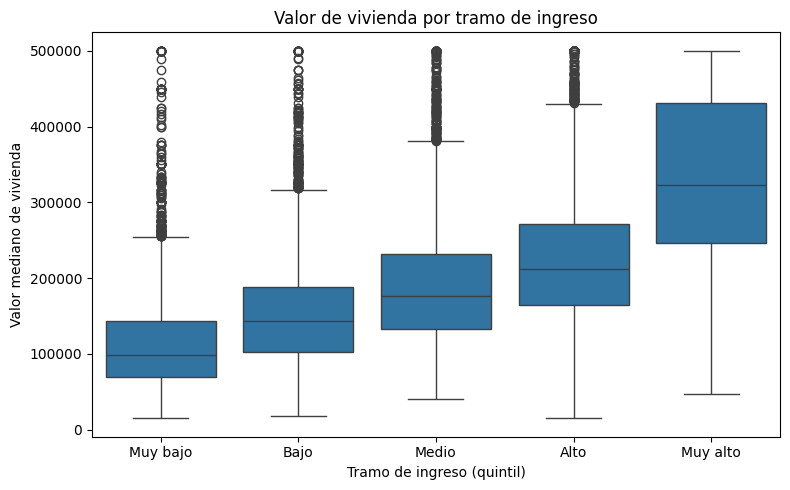

In [646]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_social, x='tramo_ingreso', y='median_house_value')
plt.title('Valor de vivienda por tramo de ingreso')
plt.xlabel('Tramo de ingreso (quintil)')
plt.ylabel('Valor mediano de vivienda')
plt.tight_layout()
plt.show()


## Grafico de Barras por tramo y cercanía al mar 

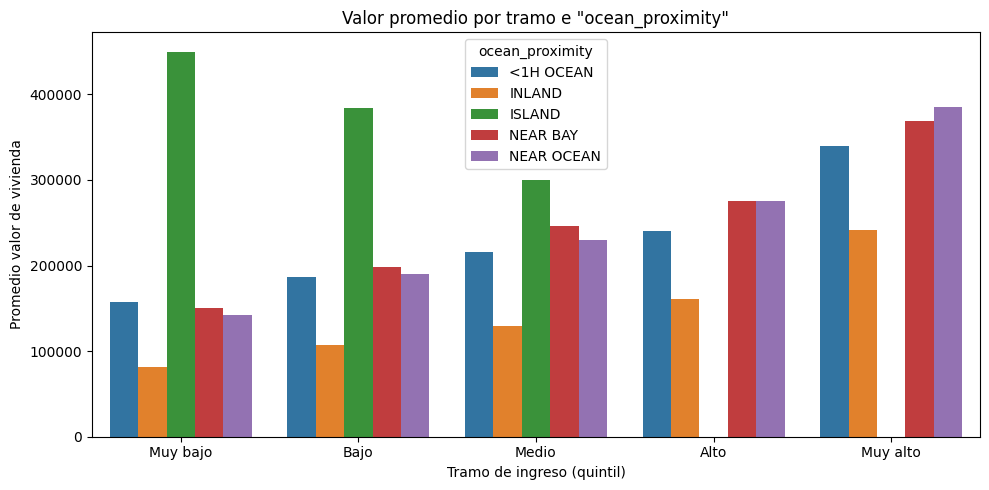

In [647]:

plt.figure(figsize=(10, 5))
sns.barplot(data=resumen, x='tramo_ingreso', y='valor_promedio', hue='ocean_proximity')
plt.title('Valor promedio por tramo e "ocean_proximity"')
plt.xlabel('Tramo de ingreso (quintil)')
plt.ylabel('Promedio valor de vivienda')
plt.tight_layout()
plt.show()


In [648]:
df_social.isnull().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            0
habitaciones_por_hogar     0
dormitorios_por_hogar      0
personas_por_hogar         0
personas_por_habitacion    0
tramo_ingreso              0
dtype: int64

# Modelo para Predecir

In [649]:
variables_interpretables = ['median_income', 'habitaciones_por_hogar', 'personas_por_hogar', 'personas_por_habitacion']

In [650]:
# Creamos la matriz de caracteristicas
X2 = df_social[variables_interpretables + ['ocean_proximity']].copy()

In [651]:
# Al igual que antes, volvemos a codificar la columna 'ocean_proximity'
encoder2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encode2 = encoder2.fit_transform(X2[['ocean_proximity']])
encode2_columns = encoder2.get_feature_names_out(['ocean_proximity'])
X2_cat = pd.DataFrame(encode2, columns=encode2_columns, index=X2.index)


In [652]:
# Escalamos las variables numéricas
escalador_int = StandardScaler()
X2_num = pd.DataFrame(escalador_int.fit_transform(X2[variables_interpretables]),
                      columns=variables_interpretables, index=X2.index)

In [653]:
#  Concatenamos las numéricas y las categóricas codificadas
X2_proc = pd.concat([X2_num, X2_cat], axis=1).values

In [654]:
# Usamos el modelo para predecir 
modelo_int = LinearRegression()
modelo_int.fit(X2_proc, df_social['median_house_value'])

LinearRegression()

In [655]:
# Predecimos
pred_int = modelo_int.predict(X2_proc)
df_social['valor_predicho_modelo'] = pred_int

print('R2 total (modelo interpretable):', round(modelo_int.score(X2_proc, df_social['median_house_value']), 3))

R2 total (modelo interpretable): 0.589


### Conclusiones

- Con `valor_predicho_modelo` el valor de vivienda aumenta con `tramo_ingreso` y mejora con mayor cercanía al mar. Ademas los diagramas de caja y el gráfico de barras muestran separación consistente entre tramos y categorías.
- **Brecha territorial (predicha)**: La diferencia relativa entre el quintil alto y el bajo es positiva y amplia, y se ve que cumple con el patrón observado en los datos reales.
